In [175]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import linalg
import circle_fit as cf

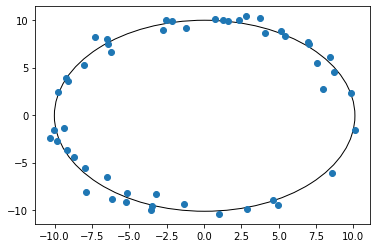

In [176]:
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t), (r+n)*np.sin(t)
points = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X, Y = points[:, 0], points[:, 1]
xc,yc,r,_ = cf.least_squares_circle((points))

figure, ax = plt.subplots()
Drawing_uncolored_circle = plt.Circle((xc, yc), r, fill=False)      
ax.add_artist(Drawing_uncolored_circle)
ax.scatter(X, Y)
plt.show()

In [177]:
def RANSAC_Circle(data_points):
    thres = np.std(points)/16
    num_iterations = np.log(1 - 0.95)/np.log(1 - (1 - 0.5)**3)
    iterations_done, max_inlier_count, best_model = 0, 0, None

    while iterations_done < num_iterations:
        iterations_done += 1
        np.random.shuffle(data_points)
        sample_data = data_points[:3]
        xc,yc,radius,_ = cf.least_squares_circle((sample_data))
        center = (xc, yc)
        error = np.abs(radius - np.sqrt(np.sum((center - points[3:])**2, axis=1)))
        inlier_count = np.count_nonzero(error <= thres)
        if inlier_count > max_inlier_count:
            max_inlier_count = inlier_count
            best_model = (center, radius, inlier_count)
    
    return best_model 

((0.3793304640040141, 0.07692526831804937), 9.969428051521648, 25)


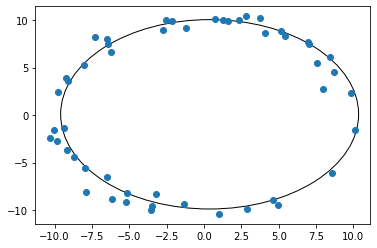

In [178]:
best_model = RANSAC_Circle(points)
print(best_model)

figure, ax = plt.subplots()
Drawing_uncolored_circle = plt.Circle(best_model[0], best_model[1], fill=False)        
ax.add_artist(Drawing_uncolored_circle)
ax.scatter(X, Y)
plt.show()